# Lab 8
## A Amar Rohith EC21B1106

1.	Train a SVM to learn an AND gate with two inputs x1 and x2. Assume that all the weights of the perceptron are initialized as 0. Show the calculation for each step and also draw the decision boundary for each update.

Predictions: [-1. -1. -1.  1.  1.]


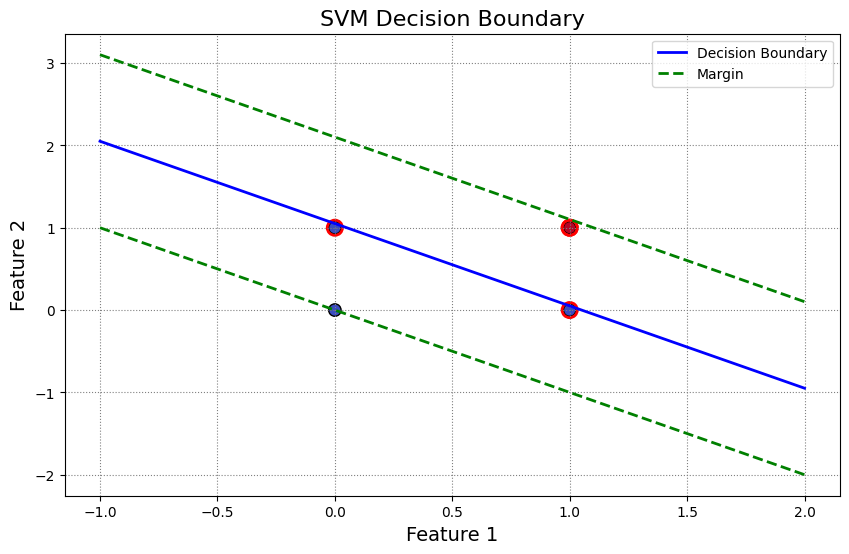

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.001
lambda_param = 0.01
n_iters = 1000


def initialize_weights(n_features):
    w = np.zeros(n_features)
    b = 0
    return w, b


def train(X, y, learning_rate, lambda_param, n_iters):
    n_samples, n_features = X.shape
    y_ = np.where(y <= 0, -1, 1)  
    w, b = initialize_weights(n_features)

    
    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, w) - b) >= 1
            if condition:
                w -= learning_rate * (2 * lambda_param * w)
            else:
                w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, y_[idx]))
                b -= learning_rate * y_[idx]
    return w, b


def predict(X, w, b):
    linear_output = np.dot(X, w) - b
    return np.sign(linear_output)


def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolors='black', s=80)

    
    x0_min, x0_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
    x0_points = np.linspace(x0_min, x0_max, 100)

    
    decision_boundary = (-w[0] * x0_points + b) / w[1]
    margin_positive = (-w[0] * x0_points + b + 1) / w[1]
    margin_negative = (-w[0] * x0_points + b - 1) / w[1]

    
    plt.plot(x0_points, decision_boundary, 'b-', label='Decision Boundary', linewidth=2)
    plt.plot(x0_points, margin_positive, 'g--', label='Margin', linewidth=2)
    plt.plot(x0_points, margin_negative, 'g--', linewidth=2)

    
    for i, x_i in enumerate(X):
        if y[i] * (np.dot(x_i, w) - b) < 1:
            plt.scatter(x_i[0], x_i[1], s=120, edgecolor='r', facecolor='none', linewidth=2)

    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)
    plt.legend(loc='best')
    plt.grid(True, linestyle=':', color='gray')
    plt.title("SVM Decision Boundary", fontsize=16)
    plt.show()


X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    [1, 1]  
])
y = np.array([-1, -1, -1, 1, 1]) 


w, b = train(X, y, learning_rate, lambda_param, n_iters)


predictions = predict(X, w, b)
print("Predictions:", predictions)


plot_decision_boundary(X, y, w, b)


3. From the iris dataset, choose the ’petal length’, ’sepal width’ for setosa, versicolor and virginica flowers. Learn a decision boundary for the two features using a SVM. Assume that all the weights are initialized as 0 and learning rate as 0.01. Plot the samples and draw the decision boundary.
[Note: => Use iris.csv file in the attachments.
 =>  3 class classification problem.]


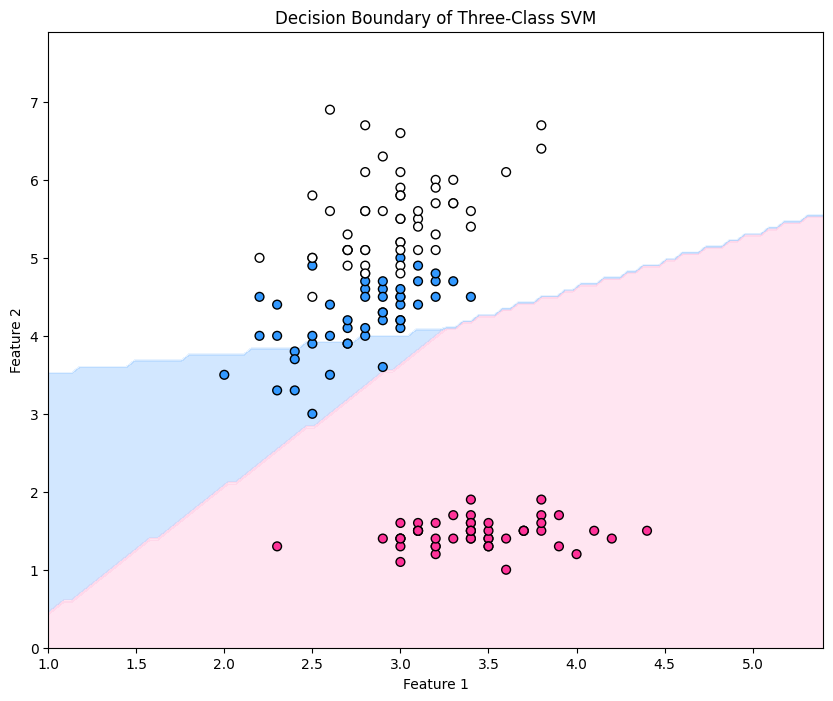

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


learning_rate = 0.001
lambda_param = 0.01
n_iters = 1000
classifiers = {}  


def init_params(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias


def train_binary_svm(X, y_binary, learning_rate, lambda_param, n_iters):
    n_samples, n_features = X.shape
    weights, bias = init_params(n_features)

    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y_binary[idx] * (np.dot(x_i, weights) - bias) >= 1
            if condition:
                weights -= learning_rate * (2 * lambda_param * weights)
            else:
                weights -= learning_rate * (2 * lambda_param * weights - np.dot(x_i, y_binary[idx]))
                bias -= learning_rate * y_binary[idx]

    return weights, bias


def fit_multi_svm(X, y, learning_rate, lambda_param, n_iters):
    classes = np.unique(y)
    classifiers = {}

    for c in classes:
        
        y_binary = np.where(y == c, 1, -1)
        weights, bias = train_binary_svm(X, y_binary, learning_rate, lambda_param, n_iters)
        classifiers[c] = (weights, bias)

    return classifiers


def predict_multi_svm(X, classifiers):
    scores = np.array([
        np.dot(X, weights) - bias
        for c, (weights, bias) in classifiers.items()
    ])
   
    return np.array(list(classifiers.keys()))[np.argmax(scores, axis=0)]


def plot_decision_boundary(X, y, classifiers):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = predict_multi_svm(grid, classifiers).reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    cmap_light = ListedColormap(['#FFCCE5', '#A6D1FF', '#FFFFFF'])  # Pink, Blue, White
    cmap_bold = ListedColormap(['#FF3399', '#3399FF', '#FFFFFF'])  # Pink, Blue, White
    plt.contourf(xx, yy, predictions, cmap=cmap_light, alpha=0.5)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary of Three-Class SVM")
    plt.show()


df = pd.read_csv("iris.csv")
label_map = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
df["label"] = df["Species"].map(label_map)
df = df[["SepalWidthCm", "PetalLengthCm", "label"]]
X = df[["SepalWidthCm", "PetalLengthCm"]].values
y = df["label"].values


classifiers = fit_multi_svm(X, y, learning_rate, lambda_param, n_iters)


plot_decision_boundary(X, y, classifiers)


4. Use the attached classification dataset. 
Files in dataset:
-	cv-train.txt - Training instances + labels (200 rows x 58 cols)
-	cv-test.txt - Test instances + labels (50 rows x 58 cols)
-	Each line of these text files is a separate training example; the first 57 columns correspond to features, while the last column is the label (+1/ − 1).
	Train a SVM model to classify the features. Calculate the accuracy of the trained SVM model. 


In [39]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import column_or_1d


dfTrain = pd.read_csv("cv-train.txt", sep="\s+", engine="python", header=None)
dfTrain = dfTrain.rename(columns={57: "label"})
dfTest = pd.read_csv("cv-test.txt", sep="\s+", engine="python", header=None)
dfTest = dfTest.rename(columns={57: "label"})


X_train = dfTrain.iloc[:, dfTrain.columns != 'label'].to_numpy()
Y_train = dfTrain.iloc[:, dfTrain.columns == 'label'].to_numpy().ravel() 


X_test = dfTest.iloc[:, dfTest.columns != 'label'].to_numpy()
Y_test = dfTest.iloc[:, dfTest.columns == 'label'].to_numpy().ravel()  


model = SVC(kernel="linear", C=1.0)

model.fit(X_train, Y_train)


predictions = model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 84.00%
